In [ ]:
import numpy as np

def leaky_relu(x, alpha=0.01):
 return np.maximum(alpha * x, x)

In [ ]:
x = np.array([-1, 0, 1])

# Leaky ReLU
print(leaky_relu(x)) # [-0.01 0. 1. ]

[-0.01  0.    1.  ]


### Plot Leaky ReLU

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_leaky_relu():
 # Generate values for x
 x = np.linspace(-10, 10, 100)
 # Define the leaky ReLU function
 def leaky_relu(x, alpha=0.1):
  return np.where(x >= 0, x, alpha * x)
 # Compute leaky ReLU values for corresponding x
 leaky_relu_values = leaky_relu(x)
 # Plot the leaky ReLU function
 plt.plot(x, leaky_relu_values)
 plt.title("Leaky ReLU Activation Function")
 plt.xlabel("x")
 plt.ylabel("Leaky ReLU(x)")
 plt.grid(True)
 plt.show()

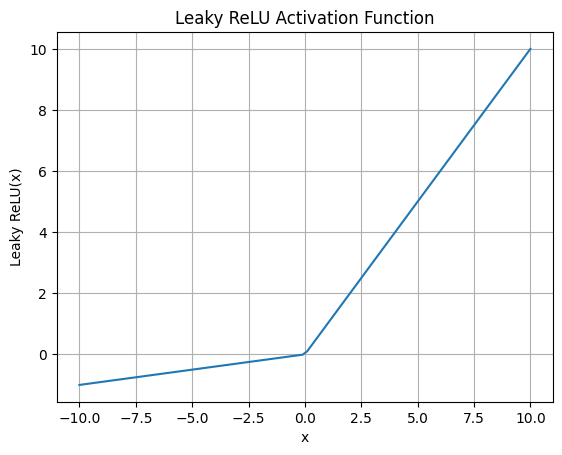

In [ ]:
plot_leaky_relu()

### Implementation of leaky relu in a neural network using the MNIST dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28 * 28).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28 * 28).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Convert labels to one-hot encodings
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

def leaky_relu(x, alpha=0.01):
 return np.maximum(alpha * x, x)

# Build the model with Leaky ReLU
model = keras.Sequential([
    layers.Dense(128, input_shape=(28 * 28,)),
    layers.LeakyReLU(alpha=0.01),  # Apply Leaky ReLU with alpha=0.01
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8775 - loss: 0.4284
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9649 - loss: 0.1211
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9762 - loss: 0.0816
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9821 - loss: 0.0575
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9859 - loss: 0.0434
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9732 - loss: 0.0906
Test Loss: 0.08051382750272751
Test Accuracy: 0.9767000079154968
